In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("Customer Churn.csv")

In [13]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


[ All the blanks of TotalCharges has beenc =n replaced with zero and the data type of the TotalCharges has been changed from object to float ]

In [9]:
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [15]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [16]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [18]:
df.duplicated().sum()

0

[Converting 0 and 1 to Yes or No in Senior Citix=zen column for more familiarity]

In [19]:
def conv(value):
    if value == 1:
        return "Yes"
    else:
        return"No"

df["SeniorCitizen"] = df["SeniorCitizen"].apply(conv)

In [20]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


[ Count of customers who have churned out ]

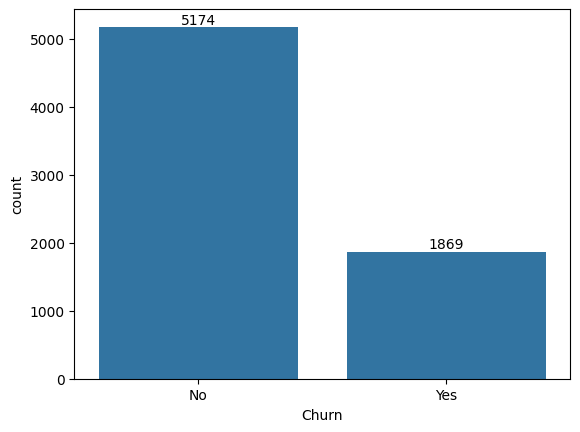

In [23]:
ax = sns.countplot(x = "Churn", data = df)
ax.bar_label(ax.containers[0])
plt.show()

[ To see how many customers have churned out by percentage ]

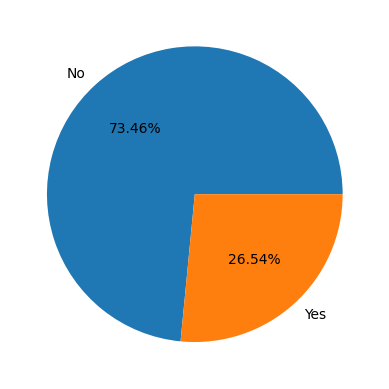

In [6]:
gb = df.groupby("Churn").agg({"Churn":"count"})
plt.pie(gb["Churn"], labels = gb.index, autopct ="%1.2f%%")
plt.show()

[ Churn out by Gender ]

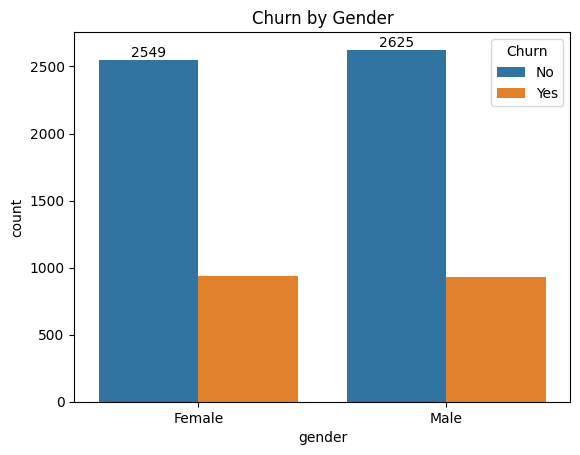

In [11]:
g = sns.countplot(x = "gender", data = df, hue = "Churn")
g.bar_label(g.containers[0])
plt.title("Churn by Gender")
plt.show()

[ Churn out by Senior Citizen ]

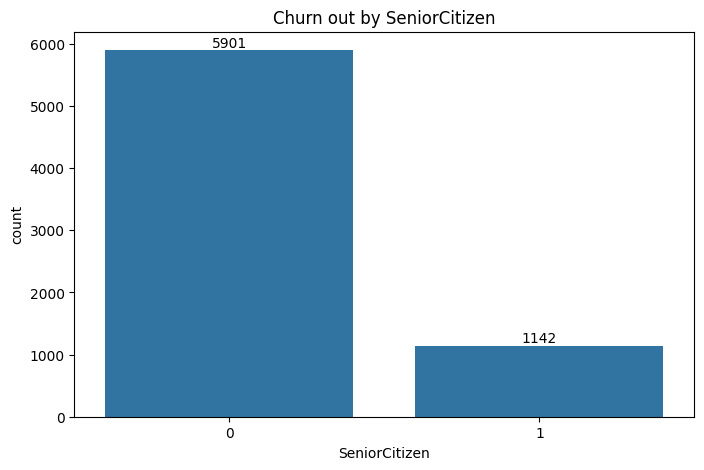

In [34]:
plt.figure(figsize = (8,5))
se = sns.countplot(x = "SeniorCitizen", data = df)
se.bar_label(se.containers[0])
plt.title("Churn out by SeniorCitizen")
plt.show()

[ Churn out by percentage based on Senior Citizen ]

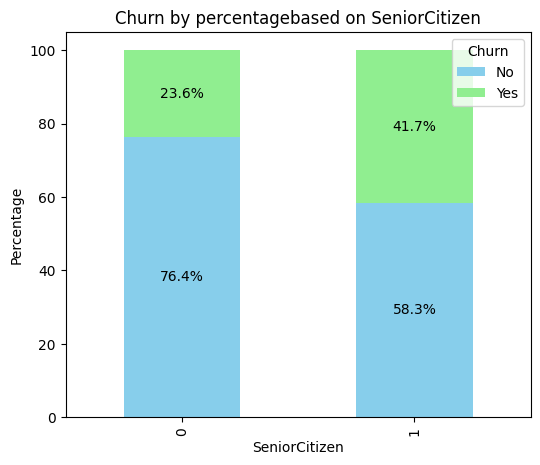

In [58]:
total_counts = df.groupby("SeniorCitizen")["Churn"].value_counts(normalize = True).unstack() * 100
fig, ax = plt.subplots(figsize = (6,5))
total_counts.plot(kind = "bar", stacked = True, ax=ax, color = ["SkyBlue", "LightGreen"])
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width/2, y + height/2, f'{height :.1f}%', ha = 'center', va = 'center')
    
plt.title("Churn by percentagebased on SeniorCitizen")
plt.xlabel("SeniorCitizen")
plt.ylabel("Percentage")
plt.legend(title ="Churn", loc = "upper right")
plt.show()
           
                  

[ Seeing how many customers have left and maintaining how much time (in months) ]

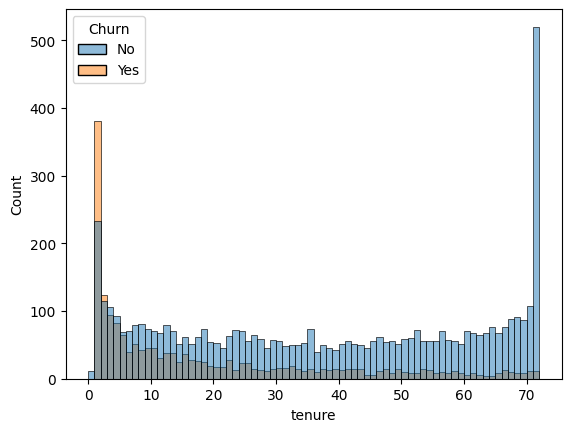

<Figure size 1000x600 with 0 Axes>

In [41]:
sns.histplot(x = "tenure", data = df, hue = "Churn", bins = 72)
plt.figure(figsize = (10,6))
plt.show()

[ Count of customers based on contact ]

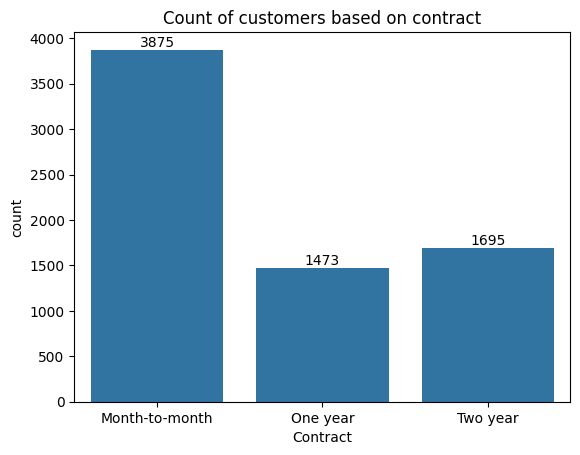

In [44]:
c = sns.countplot(x = "Contract", data = df)
c.bar_label(c.containers[0])
plt.title("Count of customers based on contract")
plt.show()

[ Multiple columns on which we want to do count plot at a single time ]

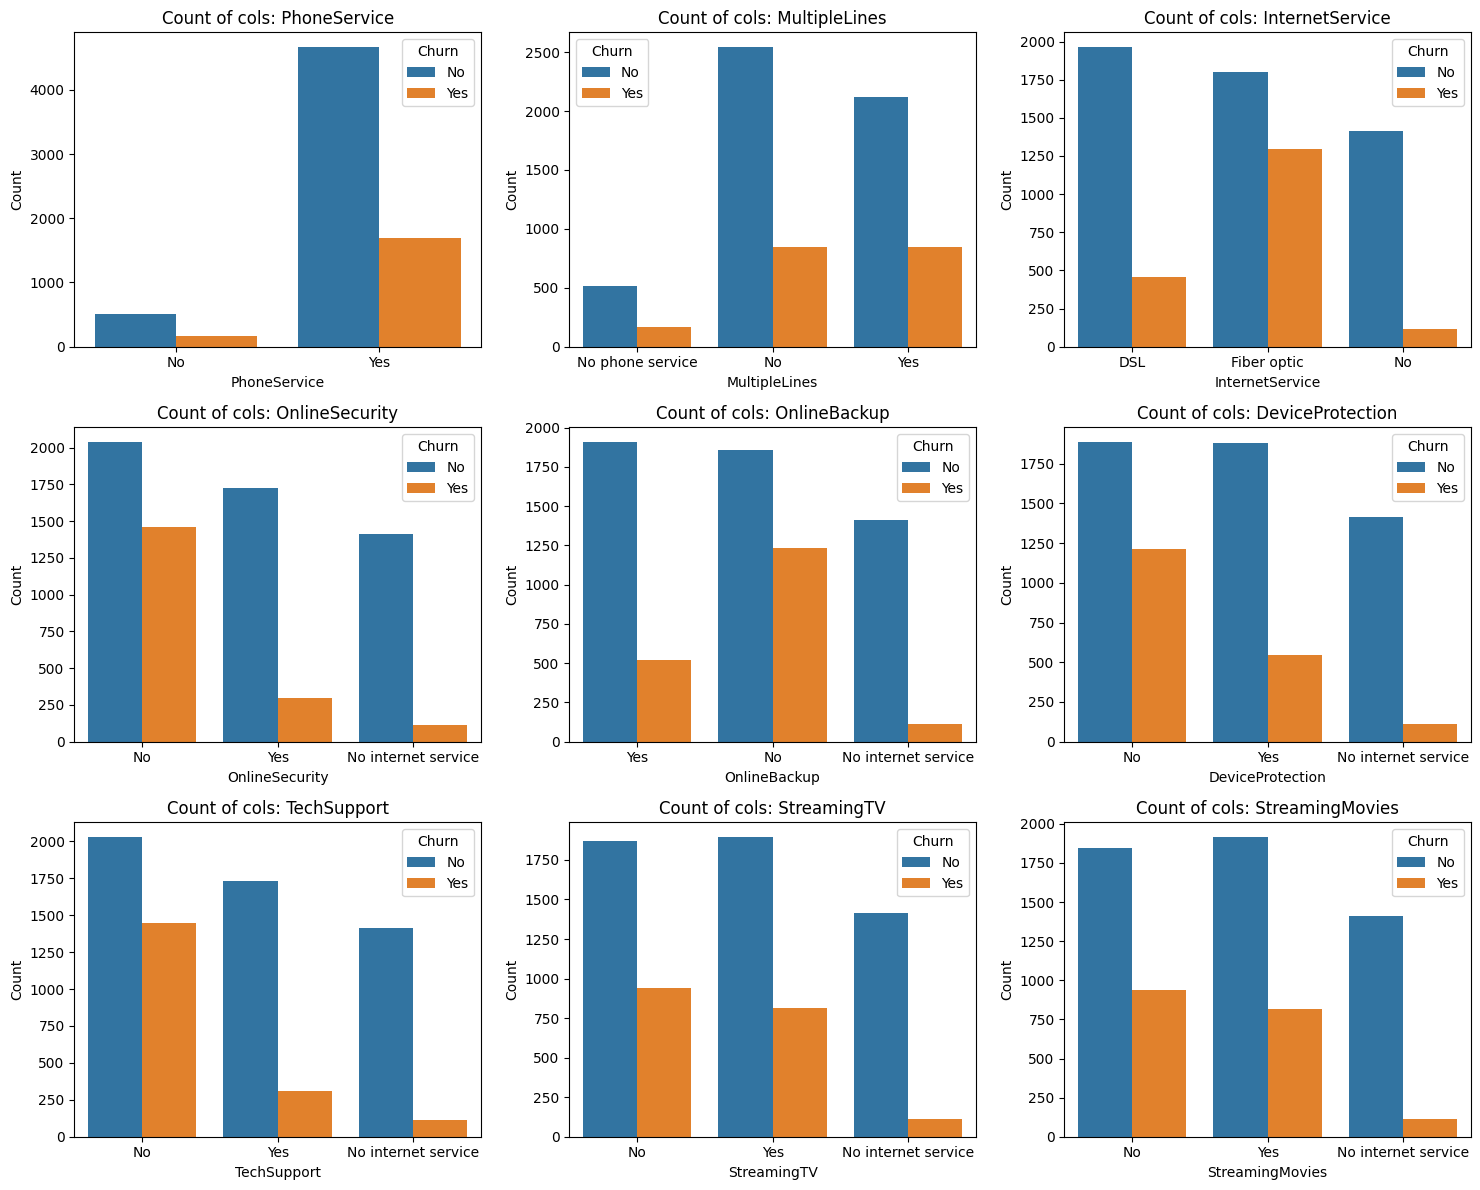

In [55]:
#List of columns to creaate subplots
columns = ["PhoneService", "MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies" ]

#Number of rows and columns for subplots 
n_cols = 3
n_rows = (len(columns) + n_cols - 1)// n_cols

#Create Subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize =(15, n_rows * 4))

#Flatten axes for easy iteration (to handle 1D and 2D arrays)
axes = axes.flatten()

#Iterate through colums and create subplots 
for i, col in enumerate(columns):
    sns.countplot(x = col, data = df, ax = axes[i], hue = "Churn")
    axes[i].set_title(f'Count of cols: {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")
    
#Remove any unused subplots (if any)
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])
    
plt.tight_layout()
plt.show()


[ Churn on the basis of payment type ]

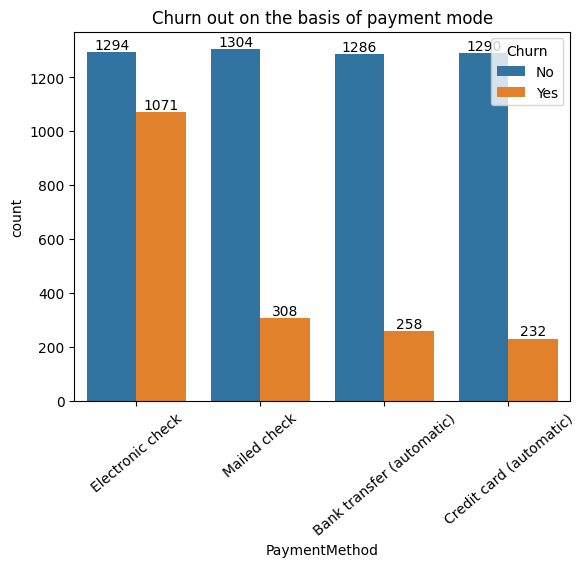

In [66]:
p = sns.countplot(x = "PaymentMethod", data = df, hue = "Churn")
p.bar_label(p.containers[0])
p.bar_label(p.containers[1])
plt.title("Churn out on the basis of payment mode")
plt.legend(title = "Churn", loc = "upper right")
plt.xticks(rotation = 40)
plt.show()

[ Customers churned out on the basis of monthly payments]

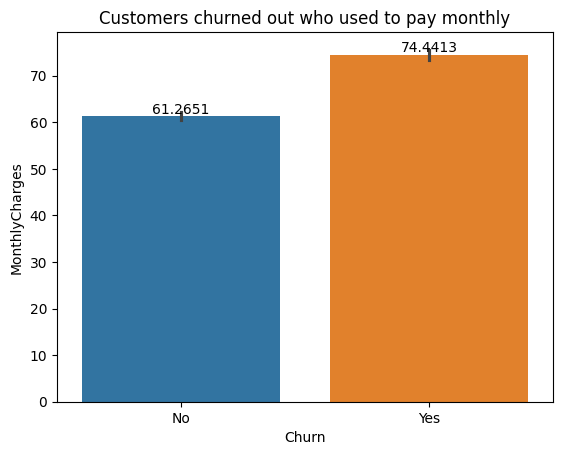

In [76]:
m = sns.barplot(x = "Churn", y = "MonthlyCharges", data = df, hue = "Churn")
m.bar_label(m.containers[0])
m.bar_label(m.containers[1])
plt.title("Customers churned out who used to pay monthly")
plt.show()